# EDA To Prediction

진행일: 2020-01-20

참고: [EDA To Prediction](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

* 이번 회차는 팀원들과 협의를 통해 1회차만 진행합니다.

## Part1: Exploratory Data Analysis(EDA)

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import time
%matplotlib inline

In [120]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
data.isnull().sum() # 총 null 값 체크

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin 그리고 Embarked에서 null 값이 있습니다. 추후에 수정하도록 하겠습니다.

### 얼마나 살아남았는가?

Text(0.5, 1.0, 'Survived')

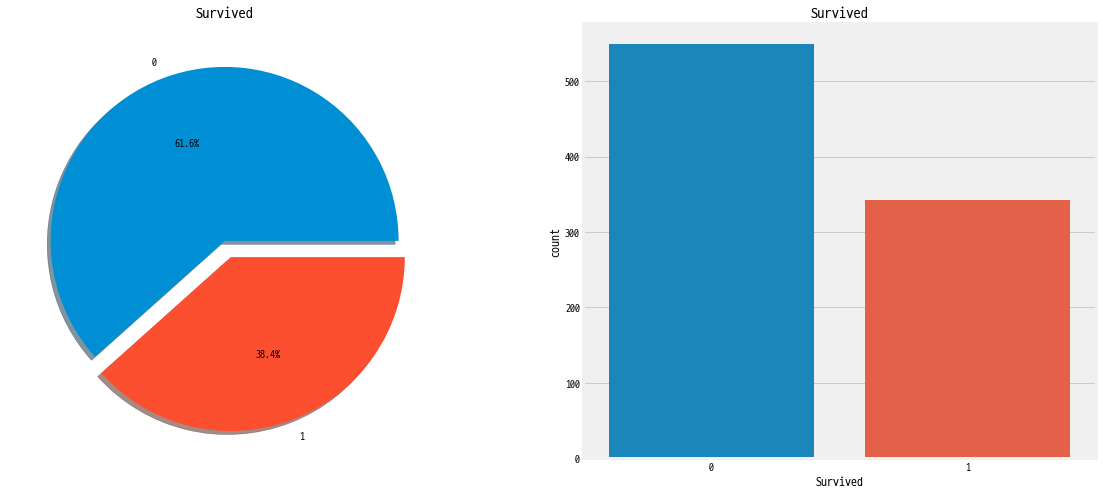

In [122]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

사고의 생존자가 많지 않은 것은 명확합니다.

training set에서 891명의 탑승객중 오직 350명만 살아남았습니다. 이는 퍼센트로 환산하면 38.4%입니다. 탑승객의 카테고리를 통해 누가 살아남고 죽었는지 더 나은 통찰로 알아볼 수 있습니다.

피처(Sex, Age, Embarked 등)들로 생존율을 확인해보겠습니다.

먼저 피처들의 타입에 대해 알아 보겠습니다.

### 피처들의 타입

- **범주형 피처**:
    범주형 변수는 두 개 이상의 카테고리가 있는 변수이며 피처의 각 값을 범주로 분류할 수 있습니다. 예를 들어, 성별은 두 개의 카테고리(남자, 여자)를 가지는 범주형 변수입니다. 이러한 변수들은 정렬하거나 순서를 매길 수 없습니다. 이를 Norminal Variables라고 부르기도 합니다.
    
>데이터셋에서 범주형 피처: Sex, Embarked
---    
    
- **순서형 피처**:
    순서형 변수는 범주형과 비슷하지만 순서를 매기거나 정렬할 수 있다는 점이 다릅니다. 예를 들어, 신장이라는 피처에는 큼, 중간, 작음의 값을 매길 수 있는데, 이 경우 신장은 순서형 변수입니다. 변수간 정렬을 할 수 있습니다.
    
>데이터셋에서 순서형 피처: Pclass
---

- **연속형 피처**:
    피처에서 두 지점 사이 또는 최대/최소값 사이에서 항상 값을 얻을 수 있는 경우 연속형 피처라 합니다.
    
>데이터셋에서 연속형 피처: Age

 ### 피처 분석하기 

#### Sex -> 범주형 피처

In [123]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex: Survived vs Dead')

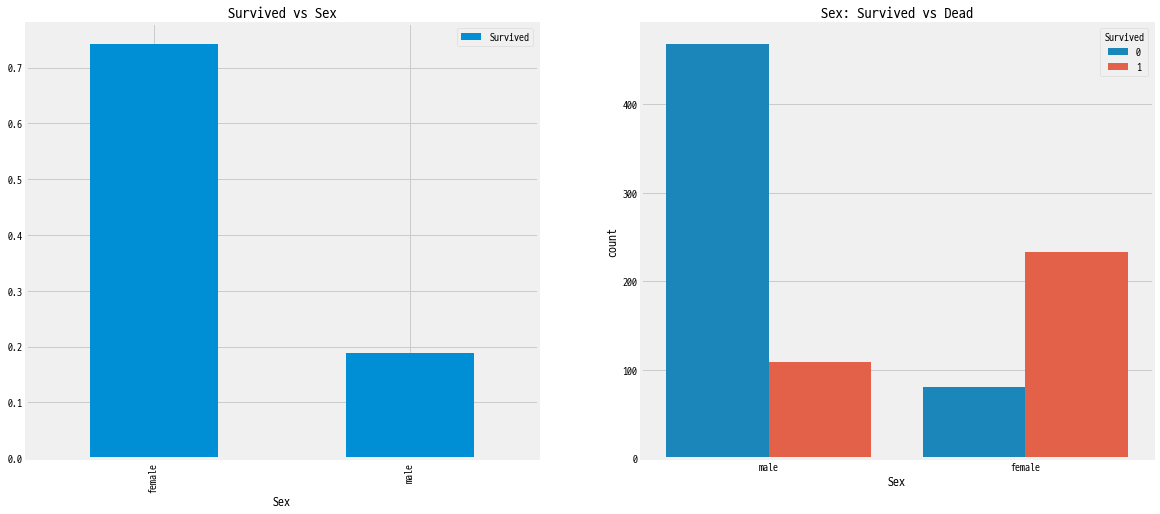

In [124]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

남자 탑승객의 수가 여자보다 월등히 많습니다. 그러나 여자가 남자보다 2배가량 살아남았습니다. 여성의 생존율은 75% 정도임에 반해, 남성은 20%를 미치지 못합니다.

#### Pclass -> 순서형 피처

In [125]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

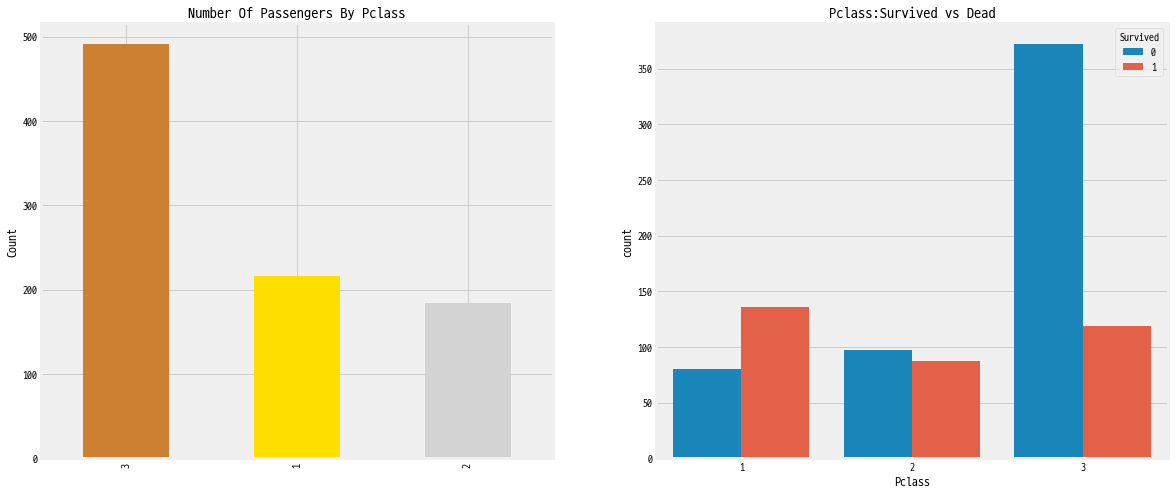

In [126]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

돈으로 모든 것을 살 수 없다지만 Pclass 1의 탑승객이 구조 대상에서 높은 우선순위를 가졌음을 알 수 있습니다. Pclass 3의 탑승객이 월등히 많지만, 살아남은 사람은 매우 적습니다(25%).

Pclass 1은 63% 정도 되는 반면 Pclass 2는 48% 정도의 생존율을 보였습니다. 

이번에는 Sex 와 Pclass을 동시에 고려해보겠습니다.

In [127]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

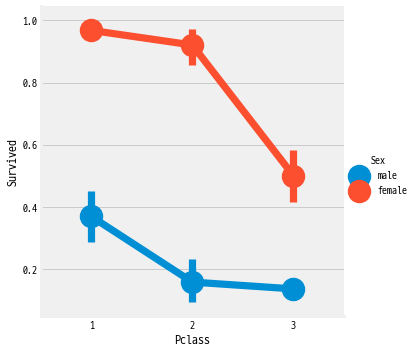

In [128]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)

FactorPlot은 범주형 변수를 쉽게 분리할 수 있는 장점이 있습니다.

CrossTab과 FactorPlot을 보면, Pclass 1의 여성의 생존율은 95-96%에 달하는 것을 알 수 있습니다. Pclass 1의 94명의 여성중 3명만 사망했습니다.

Pclass와 상관없이 여성이 구조에서 우선순위를 가진 것이 분명합니다. 심지어 Pclass 1의 남자들도 생존율이 매우 낮습니다.

그렇지만 Pclass도 중요한 피처로 생각됩니다. 다른 피처들도 살펴보겠습니다.

#### Age - 연속형 피처

In [129]:
print('가장 나이가 많은 탑승객: ', data['Age'].max(), 'Years')
print('가장 어린 탑승객: ', data['Age'].min(), 'Years')
print('탑승객의 평균나이: ', data['Age'].mean(), 'Years')

가장 나이가 많은 탑승객:  80.0 Years
가장 어린 탑승객:  0.42 Years
탑승객의 평균나이:  29.69911764705882 Years


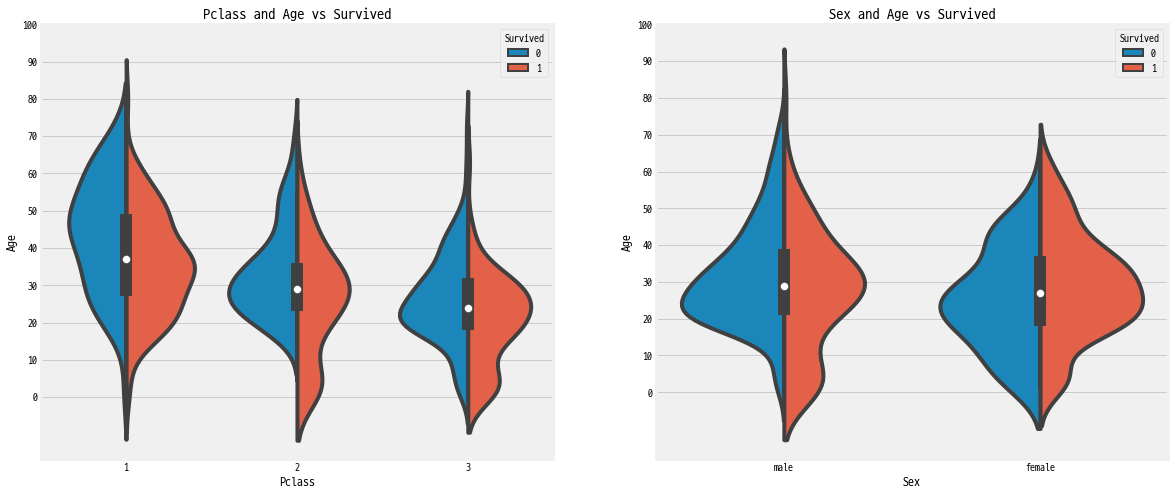

In [130]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

- Pclass가 1->3으로 갈 수록 어린이 탑승객이 많아집니다. 10살 미만 탑승객의 생존율은 Pclass의 관계없이 높아보입니다.

- 20-50세 탑승객의 생존율은 Pclass 1이 높고 여성인 경우 더 높아집니다.

- 남성의 경우, 나이가 많아질 수록 생존의 기회가 적어집니다.
---
이미 봤듯이, Age 피처는 177개의 null값을 가지고 있습니다. 이 값들을 나이의 평균으로 대체할 수도 있겠습니다.

그러나 문제는 연령분포가 다양하다는 것입니다. 우리는 4살짜리 어린아이에게 29살의 평균나이를 집어넣을 수도 있습니다. 

이러한 문제를 해결하기 위해 Name 피처를 고려해볼 수 있습니다. Mr 나 Mrs 같은 것으로 말이죠. 이러한 호칭들을 가진 사람들의 평균 나이를 해당 호칭을 가지고 있는 사람의 나이에 대입하는 것이 좋아보입니다.

In [131]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # 호칭 추출

정규표현식을 사용해 . 앞에 있는 문자열만 추출합니다.

[A-Za-z]: 문자열 추출

()\.: . 앞까지 추출

+는 여러글자

In [141]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle나 Mme같은 오타들은 Miss을 의미하는 것 같습니다. 이들을 Miss로 대체하겠습니다.

In [142]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [143]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Age NaN값 채우기

In [146]:
# 각 평균 나이로 채우기
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [148]:
data.Age.isnull().any() # False면 Null값 없음

False

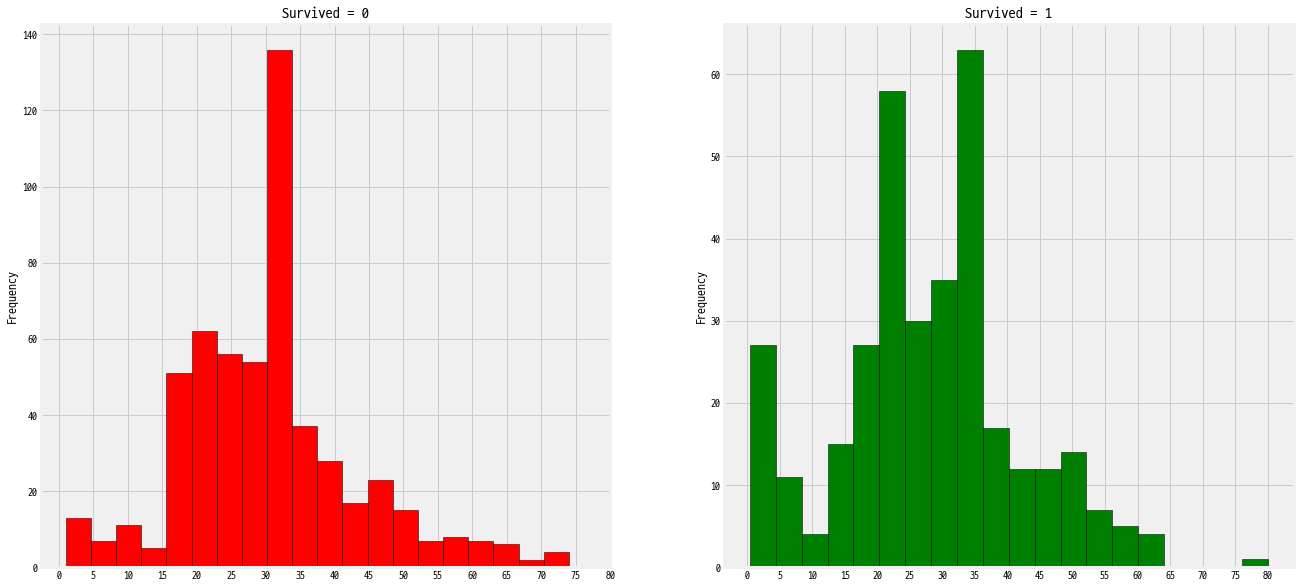

In [153]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)

- 5세 미만의 영유아들은 많은 수가 구출되었습니다. (여성 및 아이 우선 정책)

- 최고연령인 80세 승객도 살아남았습니다.

- 30-40세 그룹의 사망객이 가장 많습니다.

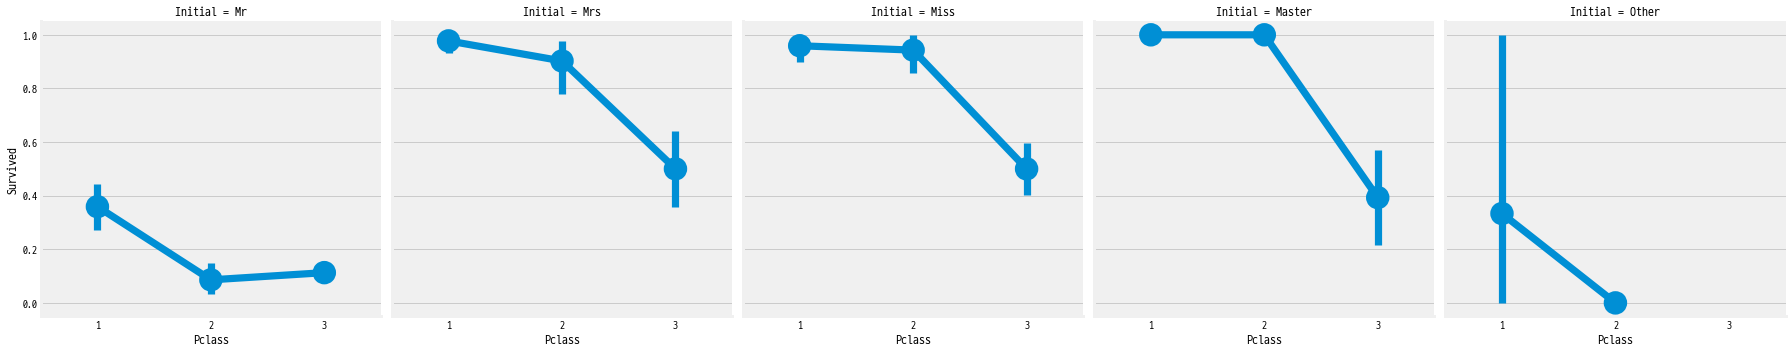

In [154]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)

Pclass에 관계없이 여성 및 아이 우선 정책이 유효했던 것으로 보입니다.

#### Embarked -> Categorical Value

In [155]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

#### 탑승 항구별 생존 가능성 파악

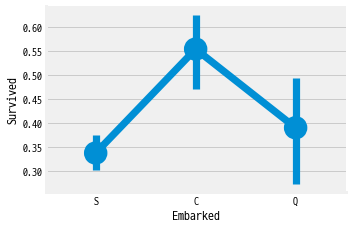

In [157]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5, 3)

C 항수에서 생존율이 55%로 가장 높고 S가 가장 낮습니다.

Text(0.5, 1.0, 'Embarked vs Pclass')

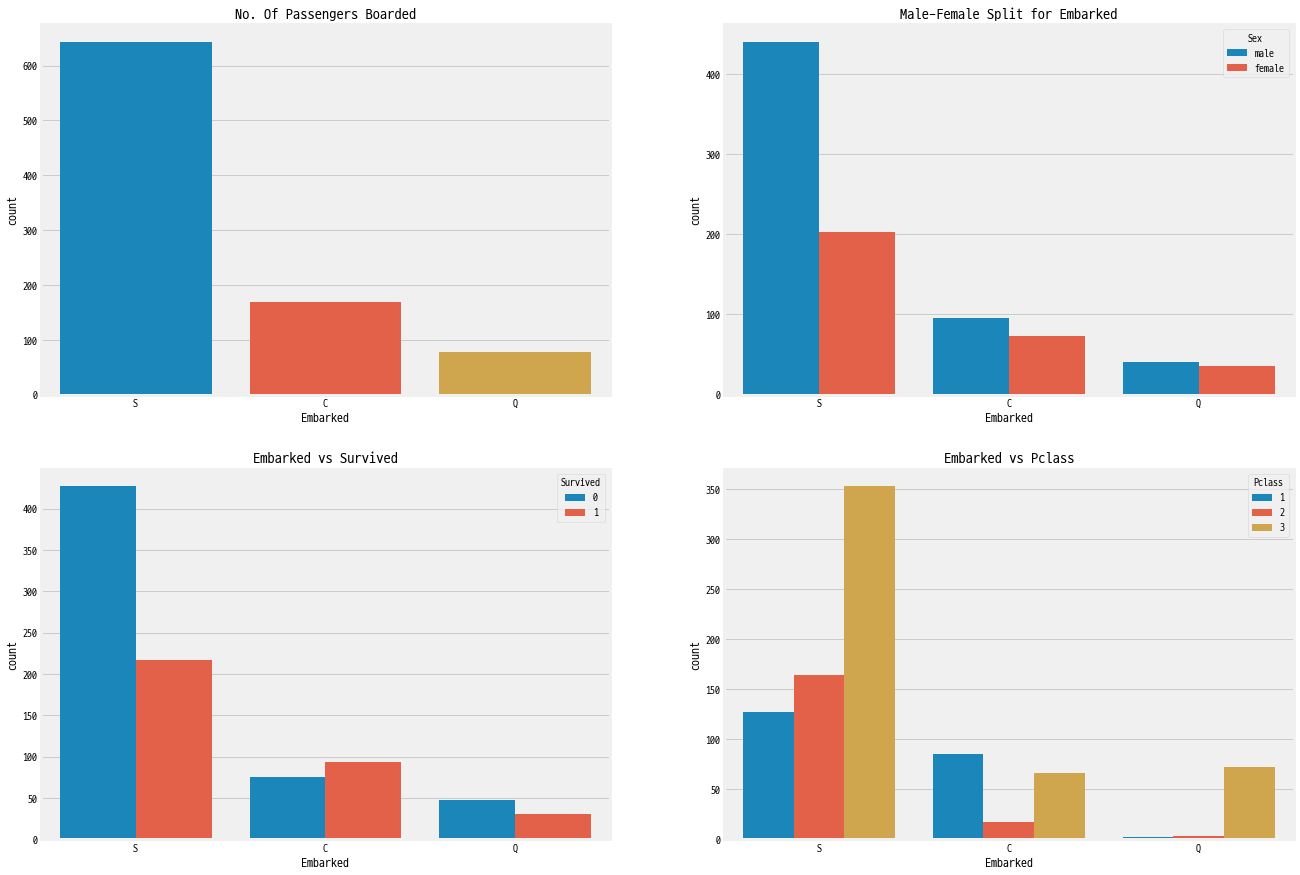

In [163]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

- S에서 가장 많은 승객이 탑승했습니다. Pclass 3이 대다수입니다.

- C의 탑승객은 높은 비율로 살아남았습니다. 이유는 Pclass 1과 Pclass 2 승객이 3보다 많기 때문입니다.

- S는 부자들이 많이 탔으나 생존율이 낮습니다. 이유는 Pclass 3의 승객중 81%가 사망했기 때문입니다.

- Q는 95%의 승객이 Pclass 3입니다.

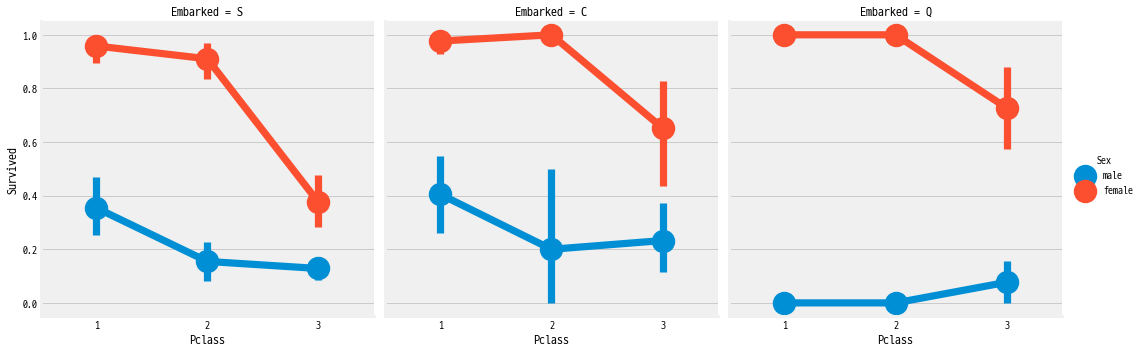

In [164]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)

- Pclass1, Pclass2의 여성 승객은 항구에 상관없이 생존율이 1에 달합니다. 

- S는 남, 여 상관없이 Pclass3 승객의 생존율이 매우 낮습니다.

- Q는 남자의 생존율이 매우 낮습니다. 대부분의 승객이 Pclass 3이기 때문입니다.

#### Embarked NaN 값 채우기

S의 승객이 가장 많았기 때문에 NaN 값을 S로 대체합니다.

In [165]:
data['Embarked'].fillna('S', inplace=True)

In [167]:
data.Embarked.isnull().any() #NaN값이 없다면 False

False

#### SibSp -> 이산형 피처

이 피처는 승객이 혼자 탑승했는지, 가족과 함께 탑승했는지 나타냅니다.

Sibling = 형제자매 + 이복 포함

Spouse = 남편, 아내

In [168]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


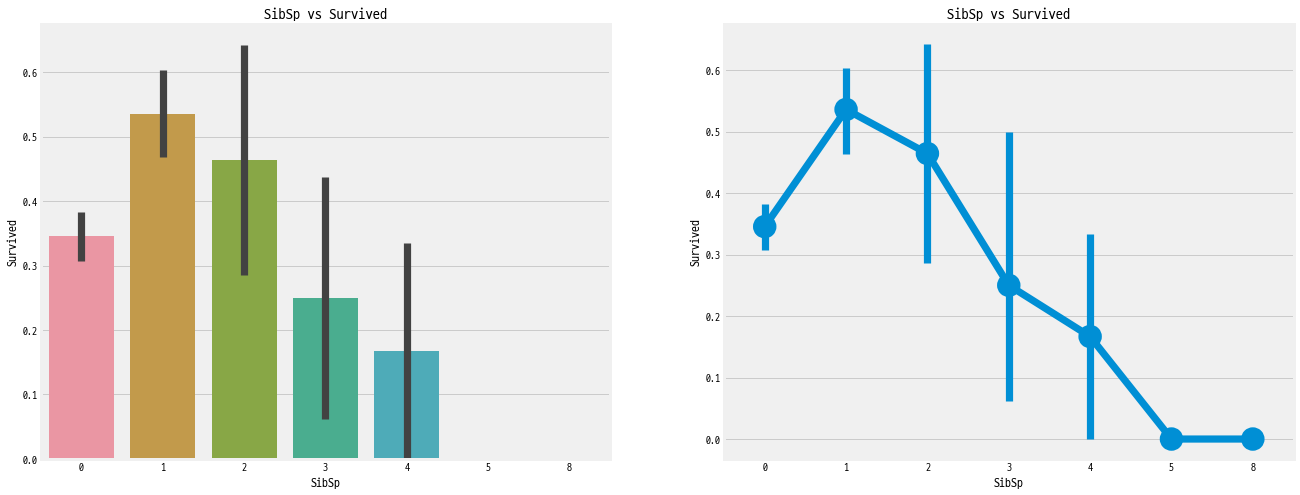

In [169]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [170]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


형제자매 없이 온 경우 34.5%의 생존율을 보입니다. 형제자매가 늘어날 수록 생존율은 감소합니다. 이는 가족들과 탑승했을 경우, 그들을 구하기 위해 희생한다는 의미인 것 같습니다. 5-8명의 가족이 있는 경우 생존율은 0%입니다.

이는 Pclass와도 연관이 있습니다. crosstab을 보면 SibSp>3이면 모두 Pclass 3입니다.

#### Parch

In [171]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


마찬가지로 Pclass3에 대가족이 있음을 알 수 있습니다.

Text(0.5, 1.0, 'Parch vs Survived')

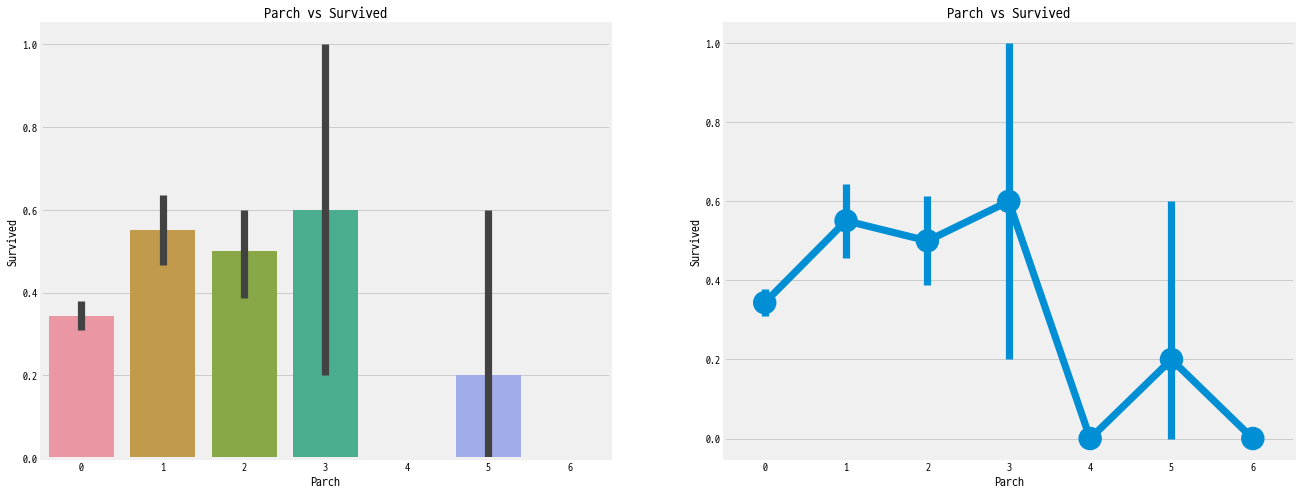

In [173]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

부모와 탑승한 경우 생존율이 높지만 가족구성원이 늘어날 수록 생존율은 급감합니다.

1-3명의 부모와 탄 경우 생존율이 제일 양호합니다. 혼자 탑승한 것과 부모가 4명이상 넘어갈 경우 생존율이 감소합니다.

#### Fare -> 연속형 피처

In [174]:
print('가장 높은 요금: ', data['Fare'].max())
print('가장 낮은 요금: ', data['Fare'].min())
print('평균 요금: ', data['Fare'].mean())

가장 높은 요금:  512.3292
가장 낮은 요금:  0.0
평균 요금:  32.2042079685746


럭셔리한 무임승차를 한 사람도 있습니다.

Text(0.5, 1.0, 'Fares in Pclass 3')

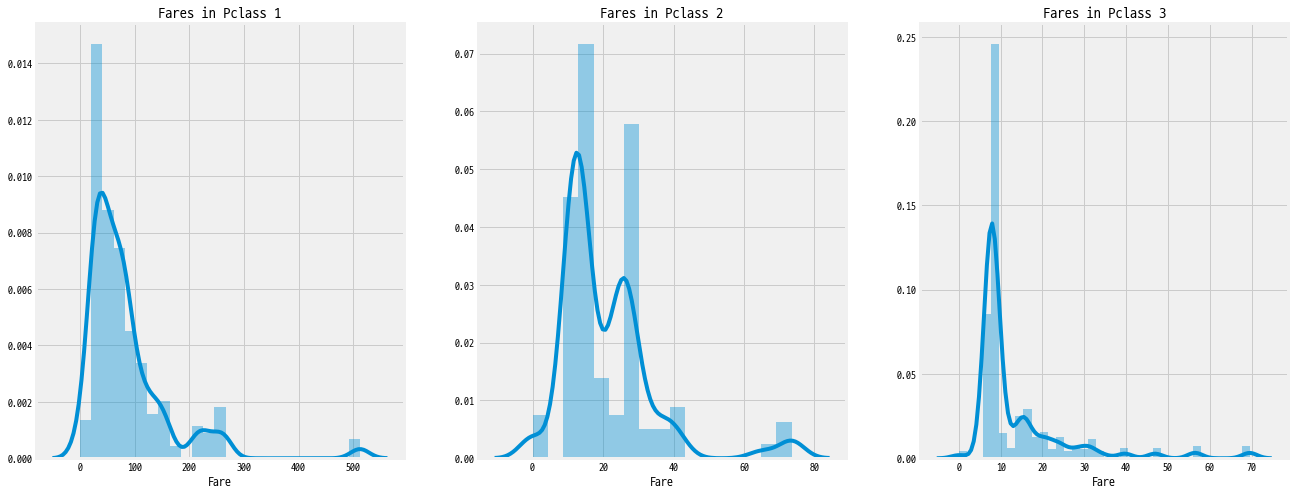

In [178]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[0].set_title('Fares in Pclass 1')
ax[1].set_title('Fares in Pclass 2')
ax[2].set_title('Fares in Pclass 3')

Pclass1 승객의 요금이 매우 큰 비중을 차지하고 있고, 클래스가 낮아질 수록 요금도 줄어듭니다. 연속적인 값을 이산값으로 변화시킬 수 있습니다.

#### 피처 속성

**Sex**: 여성이 남성보다 생존할 수 있는 확률 높음

**Pclass**: 1st 클래스의 승객이 생존할 확률 높음. Pclass 3의 승객은 매우 낮음. 여성의 경우 Pclass1일 때 생존율이 거의 1에 육박함. Pclass 2도 매우 높음.

**Age**: 5-10세 이하의 어린이 들은 매우 높은 생존율을 보임. 15-35세의 승객들은 많이 사망함.

**Embarked**: Pclass 1의 승객들은 S에서 많이 탔으나 오히려 C의 생존율이 높음. Q는 거의 Pclass 3의 승객들만 탑승함.

**Parch + SibSp**: 1-2명의 형제자매 또는 배우자와 타거나, 1-3명의 부모와 탄 경우 혼자 타거나 대가족이 탄 경우보다 생존율이 높음.

### 피처간의 상관관계

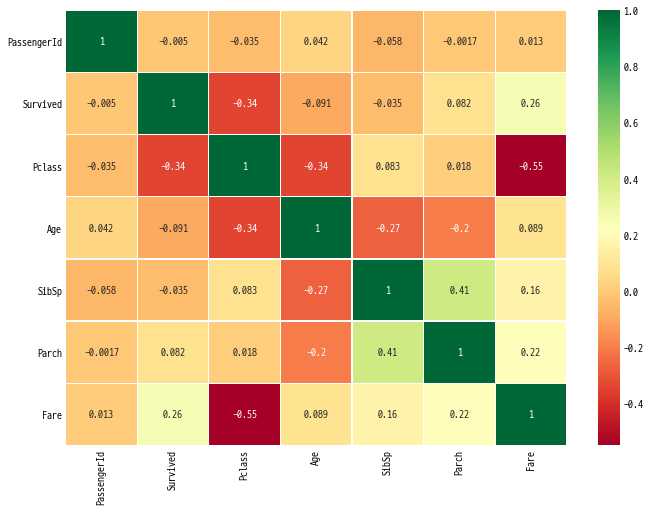

In [182]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)

#### Heatmap 해석

한 가지 주목할 점은 숫자형 피처끼리만 비교가 가능하고, 문자형은 비교가 불가능하다는 점입니다.

**양의 상관관계**: 피처 A가 증가할 때 피처 B도 증가한다면, 양의 상관관계를 갖고 있다 합니다. 1의 값을 가지면 완벽한 양의 상관관계입니다.

**음의 상관관계**: 피처 A가 증가할 때 피처 B는 감소한다면, 음의 상관관계를 갖고 있다 합니다. -1의 값을 가지면 완벽한 음의 상관관계입니다.

두 피처가 매우 높거나 완벽한 상관관계를 가지고 있다면, 두 피처는 매우 비슷한 정보를 가지고 있어서 둘 사이에 차이가 없을 수도 있습니다. 이는 다중공선성을 야기할 수 있습니다.

필요 없어보이는 피처를 찾아 봅시다. 훈련용 모델을 만들 때, 우리는 필요 없는 피처를 제거하여 traning time을 줄이고 많은 이점을 얻을 수 있습니다.

히트맵을 보면, 피처들이 서로 연관이 없어 보입니다. 가장 높은 연관성을 가진 것은 SibSp와 Parch가 0.41정도의 상관관계를 가진 것입니다. 따라서 우리는 모든 피처를 사용할 것입니다.

## Part2: Feature Engineering and Data cleaning

우리가 데이터셋에서 얻은 피처들 중에서는 필요 없는 피처들도 있습니다. 이들은 반드시 제거해야 합니다. 또한 다른 피처들을 관측 혹은 추출하여 새로운 피처를 만들 수도 있습니다.

예를 들어 Name 피처에서 Initial 피처를 얻었습니다. 해당 파트에서 몇 가지 피처는 없애고, 몇 가지 피처는 새로 만들 것입니다. 또한 예측 모델링을 위해 적절히 피처들을 변형할 것입니다.

### Age_band

Age는 연속형 피처입니다. 머신러닝 모델에서 연속형 피처를 활용하는 것은 어렵습니다. 

연속형 피처를 범주형 범주형으로 바꿔보겠습니다.

최고 연령은 80으로 , 0-80을 5개의 그룹으로 나누겠습니다.

In [184]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1


In [185]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


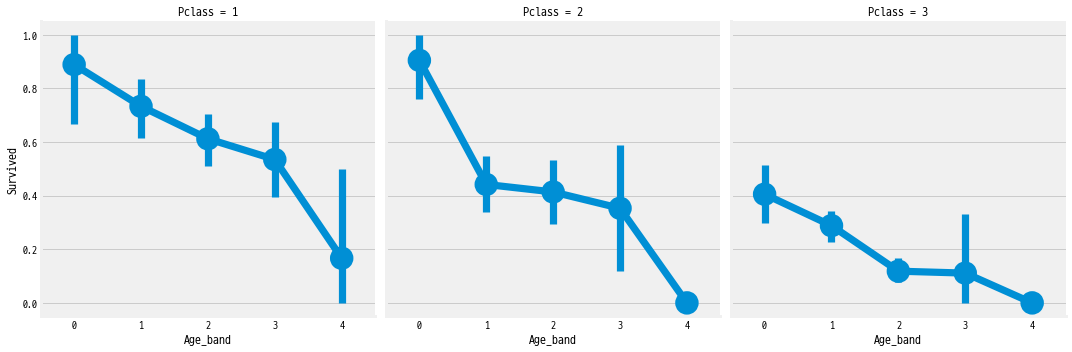

In [186]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')

Pclass에 관계 없이 나이가 많을 수록 생존율이 감소합니다.

### Family_Size and Alone

새로운 피처인 Family_Size와 Alone을 만들어 분석하겠습니다. 이 피처는 Parch와 SibSp의 합입니다. 합쳐진 데이터를 통해 생존율을 체크해봅니다. 
Alone은 혼자거나, 혼자가 아니거나를 나타냅니다.

In [188]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

Text(0.5, 1.0, 'Alone vs Survived')

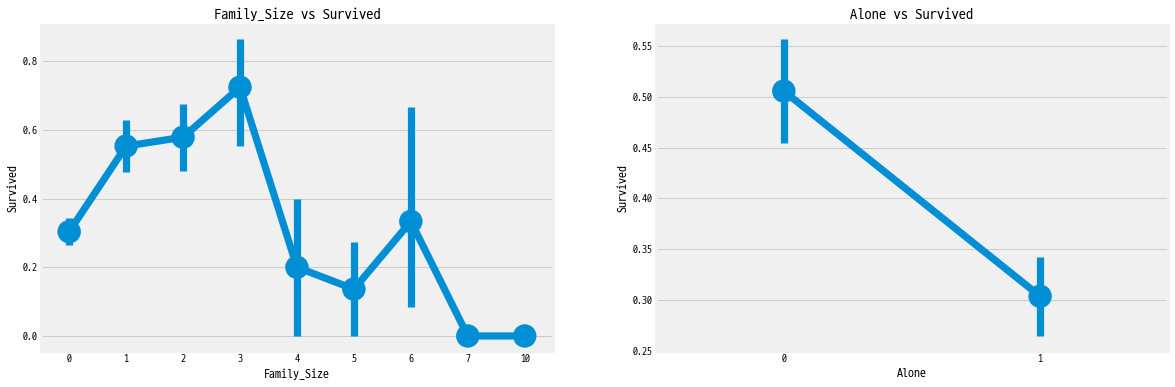

In [192]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

Family_Size = 0은 승객이 혼자 탔음(Alone)을 의미합니다. 이 경우 생존율이 매우 낮습니다. 가족 사이즈가 4보다 클때도 마찬가지 입니다. 

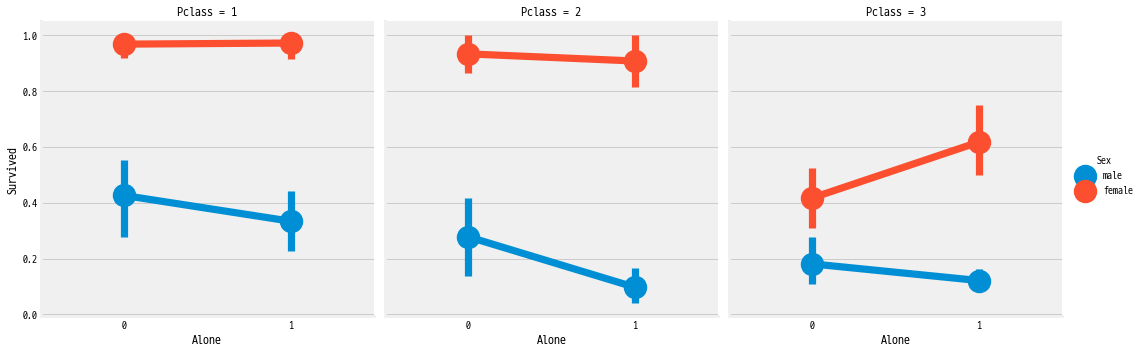

In [193]:
sns.factorplot('Alone', 'Survived', data=data, col='Pclass', hue='Sex')

혼자 탑승할 경우 성별에 관계 없이 Pclass 3에서 치명적인 생존율을 보입니다. 여성은 Pclass 3에서 가족과 같이 탑승 할 때보다 혼자 탔을 때 생존율이 높습니다.

### Fare_Range

fare은 연속형 피처로, pandas.qcut을 통해 순서형 피처로 변경하겠습니다. 

qcut은 넘겨받은 숫자 만큼 나눠줍니다.

In [196]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 언급했던 것처럼, fare_range가 커질 수록 생존율도 올라갑니다.

fare_range도 age_band처럼 바꿔주겠습니다.

In [197]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat'] = 3

<AxesSubplot:xlabel='Fare_cat', ylabel='Survived'>

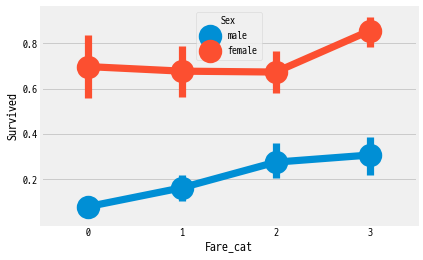

In [198]:
sns.pointplot('Fare_cat', 'Survived', data=data, hue='Sex')

Fare_cat이 커질 수록 생존율이 올라갑니다.

### 문자형 값을 정수형으로 바꾸기

머신러닝 모델에 문자형을 입력할 수 없기 때문에 정수형으로 바꿔줘야 합니다.

In [199]:
data['Sex'].replace(['male', 'female'],[0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0,1,2,3,4], inplace=True)

#### 필요없어진 피처 삭제

- **Name** -> 범주형 피처로 변환 하였음
- **Age** -> Age_band 피처로 변환하였음
- **Ticket** -> 랜덤형 문자라 범주화 할 수 없음
- **Fare** -> Fare_cat 피처로 변환하였음
- **Cabin** -> 너무 많은 NaN을 가지고 있음. 많은 승객이 여러 방을 가지고 있어서 쓸모 없음
- **Fare_range** -> fare_cat 피처로 변환하였음.
- **PassengerId** -> 범주화 불가능

In [200]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'Survived'),
  Text(0, 1.5, 'Pclass'),
  Text(0, 2.5, 'Sex'),
  Text(0, 3.5, 'SibSp'),
  Text(0, 4.5, 'Parch'),
  Text(0, 5.5, 'Embarked'),
  Text(0, 6.5, 'Initial'),
  Text(0, 7.5, 'Age_band'),
  Text(0, 8.5, 'Family_Size'),
  Text(0, 9.5, 'Alone'),
  Text(0, 10.5, 'Fare_cat')])

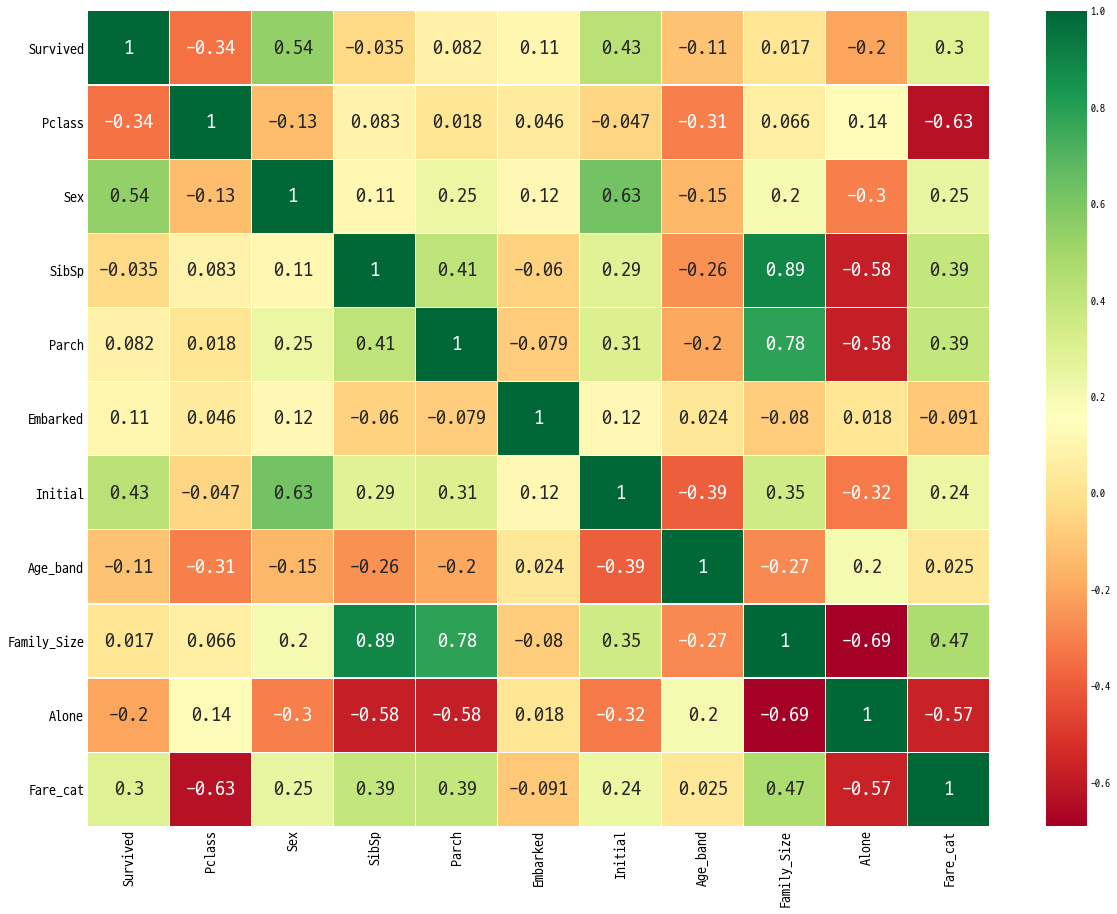

In [203]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

위의 히트맵을 통해 몇 가지 상관관계를 볼 수 있습니다. SibSp와 Family_Size 그리고 Parch 와 Family_Size는 양의 상관관계를 가지며 Alone 과 Family_Size는 음의 상관관계를 가지고 있습니다. 

## Part3: Predictive Modeling

EDA를 통해 인사이트를 얻었습니다. 그러나 정확히 누가 살고 죽었는지 예측하진 못했습니다. 그래서 여러 분류 알고리즘을 통해 생존유무를 예측해보겠습니다. 아래의 알고리즘들을 통해 진행하겠습니다.

1. Logistic Regression

2. Support Vector Machines(Linear and radial)

3. Random Forest
4. K-Nearest Neighbours
5. Naive Bayes
6. Decision Tree
7. Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [205]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [206]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('rbf SVM의 정확도: ', metrics.accuracy_score(prediction1, test_Y))

rbf SVM의 정확도:  0.835820895522388


### Linear Support Vector Machines(linear-SVM)

In [207]:
model=svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)
print('linear SVM의 정확도: ', metrics.accuracy_score(prediction2, test_Y))

linear SVM의 정확도:  0.8171641791044776


### Logistic Regression

In [208]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
print('Logistic Regression의 정확도: ', metrics.accuracy_score(prediction3, test_Y))

Logistic Regression의 정확도:  0.8134328358208955


### Decision Tree

In [209]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('Decision Tree의 정확도: ', metrics.accuracy_score(prediction4, test_Y))

Decision Tree의 정확도:  0.8059701492537313


### K-Nearest Neighbours(KNN)

In [210]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('KNN의 정확도: ', metrics.accuracy_score(prediction5, test_Y))

KNN의 정확도:  0.832089552238806


KNN의 모델은 n_neighbours의 속성에 따라 달라집니다. 디폴트값이 5입니다.
n_neighbours을 변화시켜 가며 정확도를 측정해보겠습니다.

각 n마다 정확도:  [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] 최댓값:  0.835820895522388


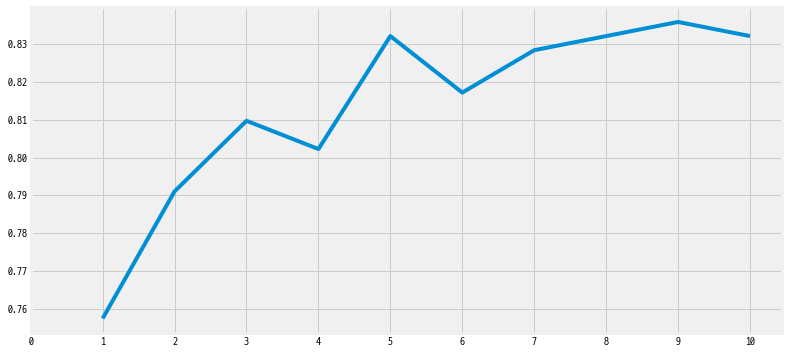

In [213]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
print('각 n마다 정확도: ', a.values, '최댓값: ', a.values.max())

### Gaussian Naive Bayes

In [214]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)
print('Naive Bayes의 정확도: ', metrics.accuracy_score(prediction6, test_Y))

Naive Bayes의 정확도:  0.8134328358208955


### Random Forests

In [218]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7 = model.predict(test_X)
print('Random Forest의 정확도: ', metrics.accuracy_score(prediction7, test_Y))

Random Forest의 정확도:  0.8171641791044776


모델의 정확성만이 분류기의 성능을 결정하는 유일한 요인이 아닙니다. 분류기가 훈련 데이터에 대하 훈련하고 검증 데이터에 90%의 정확도를 기록한다고 가정하겠습니다.

이 분류기는 매우 정확해 보이지만, 새로 도입된 검증 데이터에 90%의 정확도를 가진다고 할 수 없습니다. 분류기가 훈련할 떄 사용할 모든 인스턴스를 결정할 수 없기 때문입니다. 훈련 및 검증 데이터가 변경되면 정확도도 변경됩니다. 이를 model variance라고 합니다.

이를 극복하고 일반화된 모델을 얻기 위해 cross validation을 합니다.

## Cross Validation

데이터가 불균형한 경우가 많습니다. 따라서 데이터셋의 각 인스턴스와 모든 인스턴스에서 알고리즘을 훈련하고 검증해야 합니다. 그 후에 데이터셋에 대해 기록된 모든 정확도의 평균을 취할 수 있습니다.

1. K폴드 교차 검증은 데이터 셋을 k개의 집합으로 나누는 방식으로 동작합니다.
2. 데이터셋을 (k=5) 나눈다고 가정했을 때, 4개를 훈련시키고 1개를 검증을 위해 보존합니다.
3. 각 반복에서 검증 파트를 변경하고 다른 파트에 대한 알고리즘을 교육시킵니다. 그 후 알고리즘의 평균 정확도를 얻기 위해 정확도와 오류를 평균화합니다.

이를 K폴드 교차 검증이라고 합니다.
4. 알고리즘은 일부 훈련 데이터의 데이터 세트에 비해 적합하지 않을 수 있으며, 때론 다른 훈련 데이터셋에 과적합할 수도 있습니다. 따라서 교차 검증을 통해 일반화된 모델을 만들 수 있습니다.

In [219]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [222]:
kfold = KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models=[svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.805880,0.030238
Naive Bayes,0.801386,0.028999
Random Forest,0.815968,0.030841


<AxesSubplot:>

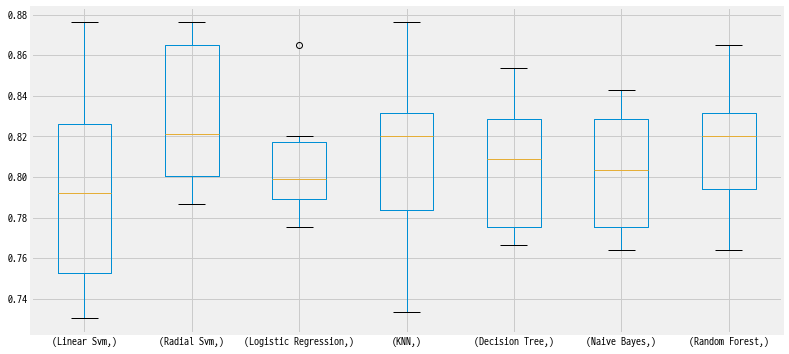

In [224]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

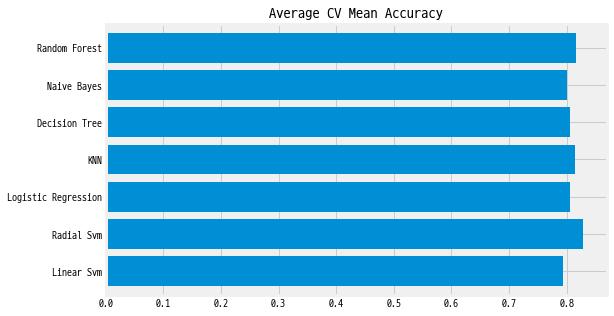

In [226]:
new_models_dataframe2['CV mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)

분류 정확도가 불균형으로 인해 오해의 소지가 있을 수 있습니다. 모형이 어디서 잘못됐는지, 또는 모형이 어떤 클래스를 잘못 예측했는지를 보여주는 confusion matrix을 통해 요약된 결과를 얻을 수 있습니다.

### Confusion Matrix

분류기에 의해 만들어진 정확하고 부정확한 분류의 수를 제공합니다.

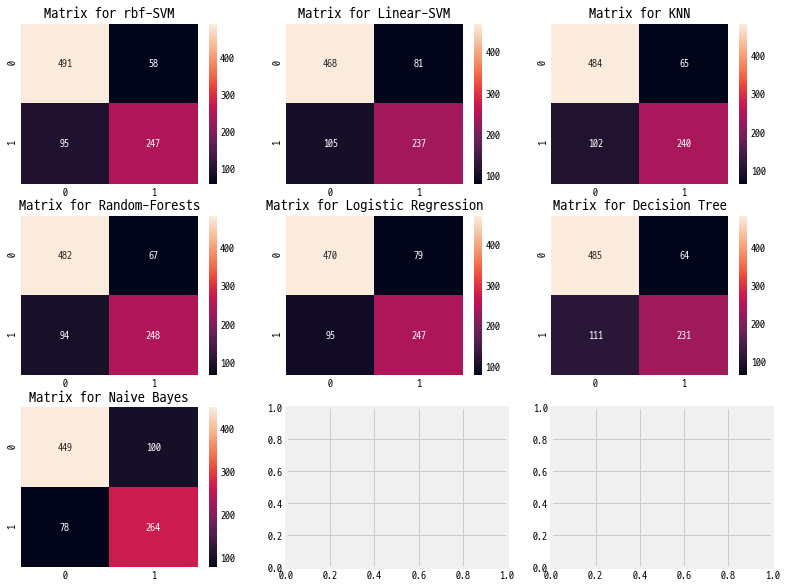

In [230]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)

#### Confusion Matrix의 해석

좌측 대각선은 정확한 예측을 한 경우, 우측 대각선은 틀린 예측을 한 경우 입니다. 첫번째 플롯인 rbf-SVM을 예로 들겠습니다.

1. 정확한 예측을 한 경우는 491(사망) + 247(생존) 으로 평균 CV 정확도는 (491+247)/829 = 82.8%
2. 오류 -> 58명의 사망자를 생존자로 분류하고, 95명의 생존자를 사망자로 분류했습니다. 

매트릭스들을 보면 rbf-SVM이 사망자를 더 정확히 예측했지만 NaiveBayes는 생존자를 더 정확히 예측했습니다.

### 하이퍼-파라미터 튜닝

머신러닝 모델은 블랙박스와 같습니다. 블랙박스에는 몇 가지 기본 매개 변수 값이 있으며, 이를 조정하거나 변경하여 더 나은 모델을 얻을 수 있습니다. SVM 모델의 C와 감마처럼, 그리고 다른 분류기에 대해 유사하게 다른 매개 변수를 하이퍼 파라미터라고 하는데, 이를 조정하여 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있습니다. 이를 하이퍼 파라미터 튜닝이라고 합니다.

우리는 SVM과 RandomForest와 같은 두 가지의 가장 좋은 분류기에 대한 하이퍼 파라미터 조정을 하겠습니다.

#### SVM

In [231]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   13.3s finished


#### Random Forest

In [232]:
n_estimators = range(100, 1000, 100)
hyper={'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   26.4s finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


rbf-SVM 의 최고 스코어는 C=0.4, gamma=0.3일 때 82.82%입니다. RandomForest는 n_estimator가 300일 때 81.93%가 나왔습니다.

### Ensembling

앙상블은 모델의 정확도나 성능을 높이는 좋은 방법입니다. 단순하게 말하면 다양한 단순 모델의 조합으로 하나의 강력한 모델을 만드는 것입니다.

여러가지 파라미터를 기준으로 전화기를 사서 많은 사람들에게 물어보고 싶다고 합시다. 우리는 모든 다른 파라미터를 분석한 후에 단일 제품에 대해 강한 판단을 내릴 수 있습니다. 이것은 모델의 안정성을 향상시키는 앙상블입니다. 다음과 같은 방법으로 수행할 수 있습니다.

1. Voting Classifier

2. Bagging

3. Boosting

#### Voting Classifier

다양하고 간단한 머신러닝 모델의 예측을 결합하는 가장 심플한 방법입니다. 모든 하위 모델의 예측에 기반한 평균 예측 결과를 제공합니다. 서브모델이나 베이스모델은 모두 다른 종류입니다.

In [234]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)), ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)), ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)), ('LR', LogisticRegression(C=0.05)), ('DT', DecisionTreeClassifier(random_state=0)), ('NB', GaussianNB()), ('svm', svm.SVC(kernel='linear', probability=True))], voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y, cv=10, scoring='accuracy')
print('The cross validated score is: ', cross.mean())

The accuracy for ensembled model is:  0.8208955223880597
The cross validated score is:  0.8249188514357053


#### Bagging

배깅은 일반적인 앙상블 방법입니다. 데이터 셋의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 취함으로써 작동합니다. 평균화로 인해 분산이 작아집니다. Voting Classifier와는 달리, 배깅은 유사한 분류기를 사용합니다.

#### Bagged KNN

배깅은 분산이 높은 모형에서 가장 잘 작동합니다. 예를 들어 DecisionTree 또는 Random Forest가 있습니다. KNN을 n_neighbours의 작은 값을 이용해 사용할 수 있습니다.

In [237]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is: ', result.mean())

The accuracy for bagged KNN is:  0.835820895522388
The cross validated score for bagged KNN is:  0.8160424469413232


#### Bagged DecisionTree

In [240]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is: ', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is:  0.8171410736579275


#### Boosting

부스팅은 분류기의 순차 학습을 사용하는 앙상블 기법입니다. 

모델은 먼저 전체 데이터셋에 교육됩니다. 이제 모델은 일부 인스턴스는 맞지만 일부는 틀립니다. 이제 다음 반복에서 학습자는 잘못 예측된 인스턴스에 더 초점을 맞추거나 더 많은 가중치를 부여합니다. 따라서 잘못된 인스턴스를 올바르게 예측하려고 합니다. 이 반복 프로세스는 계속되며, 정확도가 한계에 도달할 때까지 모델에 새로운 분류기가 추가됩니다.

##### AdaBoost(Adaptive Boosting)
이 케이스에서 약한 학습자 또는 추정치는 Decision Tree입니다. 그러나 우리는 디폴트 base_estimator을 어떠한 알고리즘으로 바꿀 수 있습니다.

In [241]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8249188514357055


##### Stochastic Gradient Boosting

마찬가지로 Decision Tree을 약한 학습자로 사용합니다.

In [242]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8115230961298376


##### XGBoost

In [247]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

[23:22:02] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:02] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:03] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:03] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

AdaBoost에서 가장 높은 점수가 나왔습니다. 하이퍼 파라미터 튜닝을 통해 점수를 올려보겠습니다.

##### Hyper-Parameter Tuning for AdaBoost

In [248]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  6.2min finished


가장 높은 정확도는 n_estimators = 100, learning_rate = 0.1일때 82.94%가 나왔습니다.

#### Confusion Matrix for the Best Model 

<AxesSubplot:>

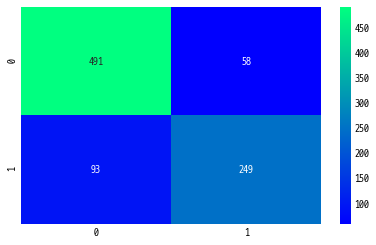

In [249]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')

#### Feature Importance

[23:53:06] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:541: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:53:06] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 1.0, 'Feature Importance in XgBoost')

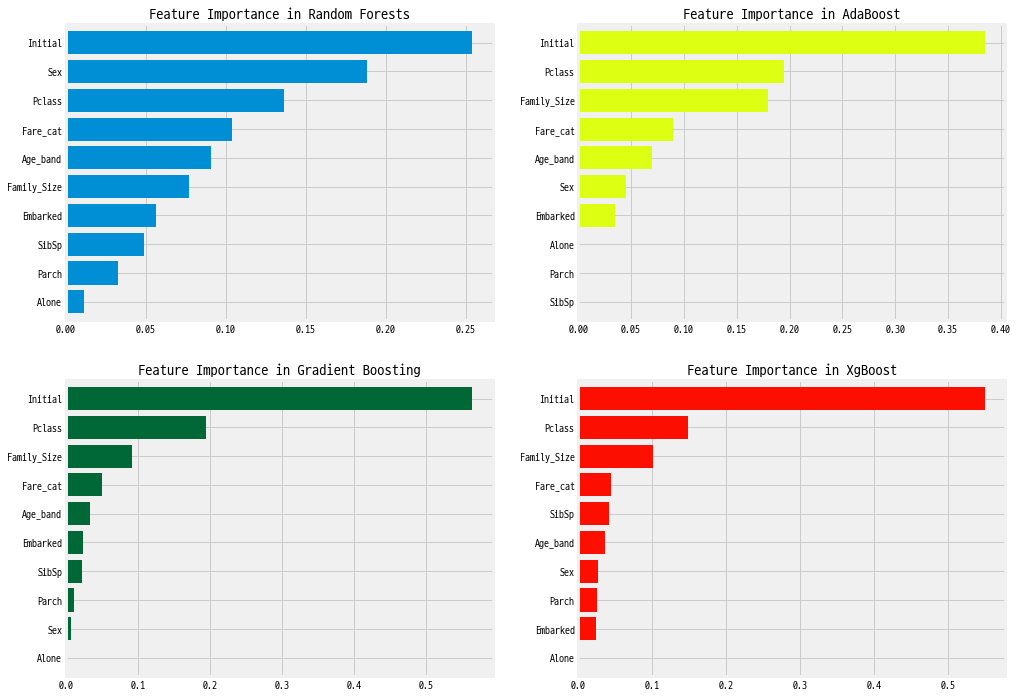

In [254]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learn_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

1. Initial, Pclass, Fare_cat, Family_Size 가 공통적으로 중요한 피처로 나타납니다.
2. Sex 피처는 중요해 보이지 않습니다. EDA에서 매우 유의미한 피처로 생각되었는데 말이죠. Sex 피처는 오직 Random Forest 에서만 중요하게 나옵니다.

그러나 Initial 피처는 모두 중요하게 나옵니다. 이미 Sex와 Initial 피처는 양의 상관관계가 있음을 파악했기 때문에, 성별과 관련있습니다.
3. 마찬가지로, Pclass와 Fare_cat은 승객의 상태와 Alone, Parch 및 SibSp을 포함한 Family_Size를 나타냅니다.